In [1]:
# libraries
import jedi
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_profiling
import pygments
import random 
import re
import seaborn as sns
from scipy import stats as st
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
import string
from tqdm import tqdm
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# Versions
print("jedi version:", jedi.__version__)
print("json version:", json.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("pandas profiling version:", pandas_profiling.__version__)
print("Pygments version:", pygments.__version__)
print("re version:", re.__version__)
print("Seaborn version:", sns.__version__)
print("SKLearn version:", sklearn.__version__)

jedi version: 0.15.1
json version: 2.0.9
numpy version: 1.17.2
pandas version: 0.25.1
pandas profiling version: 2.4.0
Pygments version: 2.4.2
re version: 2.2.1
Seaborn version: 0.9.0
SKLearn version: 0.21.3


In [3]:
# Directories & Files
os.listdir()

# Datasets directory
directory = "./datasets/"

## Database Documentation: 

* Equal Opportunities for Women and Men: Promotions, leadership roles, salary increases, incentive programs, etc

* Female Representation in Leadership: Women on the executive team, in senior leadership, etc

* Management Opportunities: Your chances of becoming a manager of teams and talent

* Maternity and Adoptive Leave: Paid parental leave policies, job security, support for returning moms, etc

* Family Growth Support: Access to dedicated lactation rooms, child care, expense reimbursement, etc

* Paid Time Off: Sick days, vacation days, and personal days

* Flexible Work Hours: Ability to set your schedule as long as you get your work done

* Ability to Telecommute: Flexibility to work remotely

* Salary Satisfaction: Salary, merit increases, cost of living adjustments, overall comp

* Sponsorship or Mentorship Program: Official mentorship program, women-focused initiatives or affiliate groups

* Learning Opportunities: On and off-site skills training, speaker series, conferences, etc

* Wellness Initiatives: On-site gym, gym discounts, walking desks, healthy food options, etc

* Employer Responsiveness: Effective channels for elevating issues and concerns

* The People You Work With: Respectful, professional, unbiased, all those good things

* Social Activities and Environment: Happy hours, game room, company outings, and other perks

In [4]:
# creating locations to populate
locations = ['Lisboa', 'Porto', 'Braga', 'Setúbal', 'Aveiro', 'Faro', 'Leiria', 'Coimbra', 
             'Santarém', 'Viseu','Viana do Castelo', 'Madeira', 'Açores', 'Vila Real', 
             'Castelo Branco', 'Évora', 'Guarda', 'Beja', 'Bragança', 'Portalegre']

# creating job_types to populate
job_type = ['Full-time', 'Part-time', 'Contract', 'Temporary', 'Internship', 'Other']

# creating job_levels to populate
job_level = ['Early Career', 'Mid-Level', 'Senior-Level', 'Executive']

# creating job_departments to populate
job_department = ['Accounting & Finance', 'Admin', 'Business Development', 
                  'Business Intelligence', 'Communications', 'Customer Service', 'Design', 
                  'Engineering', 'Human Resources', 'IT', 'Legal', 'Management', 'Marketing', 
                  'Operations', 'Product', 'Production', 'Research & Development', 'Sales', 
                  'Tech', 'Other']

# creating companies, departments and titles to populate
company_department_jobtitle = pd.read_csv(directory + "data_for_random.csv", sep = ";", 
                                     error_bad_lines = False, encoding = 'cp1252')

# creating employment_status
employment_status = ["Current Employee", "Former Employee"]

# creating last_year_of_employment
last_year_of_employment = [i for i in range(2000, 2021)]

In [5]:
# separating into 3 df's
company = company_department_jobtitle["Company"]
department = company_department_jobtitle["Department"]
jobtitle = company_department_jobtitle["Job Title"]

# cleaning the NaN's
company.dropna(inplace = True)
department.dropna(inplace = True)
jobtitle.dropna(inplace = True)

In [6]:
# setting the size of the DF to populate
size = 10000

# setting the distribution to populate ratings
def ratings(inteiro):
    return st.norm.rvs(loc = inteiro, scale = 1, size = size)

# setting another distribuition to vary the distribuitions to pop ratings
p_ratings = st.poisson.rvs(loc = 3 , mu = 3, size = size)

In [7]:
# setting the distribution to populate salaries
salary = st.norm.rvs(loc = 18000, scale = 8000, size = size)

In [9]:
# creating and filling the columns for the DF
dataset = {"company_id": [i for i in range(size)], 
          "company_name": [random.choice(company) for i in range(size)], 
          "user_id": [1000 + i for i in range(size)], 
          "employment_status": [random.choice(employment_status) for i in range(size)], 
          "last_year_of_employment": [random.choice(last_year_of_employment) for i in range(size)], 
          "location": [random.choice(locations) for i in range(size)], 
          "job_location": [random.choice(locations) for i in range(size)], 
          "job_type": [random.choice(job_type) for i in range(size)], 
          "job_level": [random.choice(job_level) for i in range(size)], 
          "department": [random.choice(job_department) for i in range(size)], 
          "job_title": [random.choice(jobtitle) for i in range(size)], 
          "equal_opportunity": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "leadership_female_representation": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "women_management_opportunities": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "maternity_adoptive_leave": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "family_growth_support": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "paid_time_off": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "flexible_work_hours": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "ability_to_telecommute": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "salary_satisfaction": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "sponsorship_or_mentorship_program": [round(random.choice(p_ratings)) for i in range(size)], 
          "learning_opportunities": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "wellness_initiatives": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "employer_responsiveness": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "people_you_work_with": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "social_activities_environment": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "overall_satisfaction": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "public_comment": ["".join([random.choice(string.printable) for i in range(15)]) for j in range(size)], 
          "asked_pay_raise_last_12_months": [random.choice([0, 1, 2]) for i in range(size)], 
          "think_pt_buiz_doing_enough_to_address_gender_pay_gap": [random.choice([0, 1]) for i in range(size)],
          "think_gov_doing_enough_to_address_gender_pay_gap": [random.choice([0, 1]) for i in range(size)], 
          "confidence_in_ability_to_negotiate_salary": [round(random.choice(ratings(random.randint(0, 5)))) for i in range(size)], 
          "sex_orientation": [random.choice(["Heterosexual", "Heterosexual", "Heterosexual", "Heterosexual", "Heterosexual", "Heterosexual", "Heterosexual", "Gay/Lesbian", "Gay/Lesbian", "Bisexual", "Other"]) for i in range(size)], 
          "gender": [random.choice(["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Non-Binary", "Other"]) for i in range(size)], 
          "marital_status": [random.choice([0, 1]) for i in range(size)], 
          "children": [random.choice([0, 1]) for i in range(size)], 
          "education": [random.choice([0, 1, 2]) for i in range(size)],
          "salary": [round(random.choice(salary), 2) for i in range(size)]}

In [10]:
# initializing the DF
df = pd.DataFrame(dataset)

In [11]:
# checking the df
df.sample(10)

,company_id,company_name,user_id,employment_status,last_year_of_employment,location,job_location,job_type,job_level,department,...,asked_pay_raise_last_12_months,think_pt_buiz_doing_enough_to_address_gender_pay_gap,think_gov_doing_enough_to_address_gender_pay_gap,confidence_in_ability_to_negotiate_salary,sex_orientation,gender,marital_status,children,education,salary
4566,4566,TAP Air Portugal,5566,Former Employee,2003,Madeira,Leiria,Internship,Mid-Level,Marketing,...,2,0,1,3.0,Heterosexual,Male,0,1,2,28734.17
9751,9751,Critical Software,10751,Current Employee,2012,Viana do Castelo,Lisboa,Full-time,Mid-Level,Tech,...,0,0,0,1.0,Heterosexual,Male,0,1,1,28187.85
8034,8034,Altri,9034,Current Employee,2001,Açores,Lisboa,Part-time,Early Career,Communications,...,1,0,1,0.0,Gay/Lesbian,Male,0,1,2,6161.21
1280,1280,Fábrica Nacional de Munições de Armas Ligeiras,2280,Former Employee,2012,Bragança,Vila Real,Temporary,Mid-Level,Accounting & Finance,...,0,1,0,-1.0,Heterosexual,Female,0,1,1,27018.40
3947,3947,Move Interactive,4947,Current Employee,2008,Braga,Beja,Internship,Mid-Level,Legal,...,1,1,1,6.0,Heterosexual,Male,1,0,2,20979.77
470,470,Critical Software,1470,Former Employee,2019,Portalegre,Évora,Part-time,Early Career,Tech,...,2,1,0,4.0,Heterosexual,Female,1,1,0,24630.92
9489,9489,Redes Energéticas Nacionais (REN),10489,Former Employee,2008,Porto,Aveiro,Contract,Early Career,Business Development,...,1,0,1,1.0,Heterosexual,Female,1,0,1,16136.01
6428,6428,Unicer Brewery,7428,Current Employee,2020,Portalegre,Coimbra,Internship,Executive,Accounting & Finance,...,0,1,1,2.0,Heterosexual,Female,0,0,0,19403.39
4404,4404,Continente,5404,Current Employee,2013,Castelo Branco,Viana do Castelo,Internship,Mid-Level,Production,...,0,0,1,4.0,Gay/Lesbian,Female,1,0,2,21900.32
7024,7024,Jerónimo Martins,8024,Former Employee,2009,Bragança,Portalegre,Temporary,Early Career,Operations,...,2,1,1,4.0,Heterosexual,Other,1,1,0,11130.95


In [12]:
# changing last year of employment to be coherent w/last_year_of_employment
current_employee = df["employment_status"] == "Current Employee"
year = "last_year_of_employment"

df.loc[current_employee, year] = 2020

In [13]:
# recreating the DS
for key in dataset.keys():
     if (df[key].dtype == "float64"):
            df[key] = np.random.randint(0, 6, df.shape[0])

'# recreating the DS\nfor key in dataset.keys():\n     if (df[key].dtype == "float64"):\n            df[key] = np.random.randint(0, 6, df.shape[0])'

In [14]:
# changing ratings to be between 0 and 5 
for col in df.columns:
    if (df[col].dtype == "float64") & (col != "salary"):
        small_mask = (df[col] < 0)
        big_mask = (df[col] > 5)
        df.loc[small_mask, col] = 0
        df.loc[big_mask, col] = 0
        
        # checking
        print((df[col] < 0).sum())

# changing salary to be > 0
less_than_0_salary = (df["salary"] < 0)

df.loc[less_than_0_salary, "salary"] = 0

# checking
(df["salary"] < 0).sum()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0

In [15]:
df.sample(10)

,company_id,company_name,user_id,employment_status,last_year_of_employment,location,job_location,job_type,job_level,department,...,asked_pay_raise_last_12_months,think_pt_buiz_doing_enough_to_address_gender_pay_gap,think_gov_doing_enough_to_address_gender_pay_gap,confidence_in_ability_to_negotiate_salary,sex_orientation,gender,marital_status,children,education,salary
8418,8418,Cofina,9418,Former Employee,2015,Lisboa,Faro,Contract,Senior-Level,Business Intelligence,...,0,0,0,0.0,Heterosexual,Male,1,1,2,21083.49
6832,6832,Move Interactive,7832,Former Employee,2014,Coimbra,Viana do Castelo,Contract,Early Career,Research & Development,...,1,1,1,3.0,Heterosexual,Female,1,0,0,18315.64
5930,5930,Bial,6930,Current Employee,2020,Viseu,Évora,Contract,Executive,Management,...,1,1,1,5.0,Heterosexual,Male,1,1,1,27041.60
7277,7277,MEO,8277,Former Employee,2001,Coimbra,Braga,Part-time,Early Career,Legal,...,1,1,0,4.0,Heterosexual,Other,1,1,1,24089.55
2151,2151,SAPO,3151,Former Employee,2002,Viseu,Madeira,Internship,Early Career,Marketing,...,0,1,1,3.0,Heterosexual,Female,0,0,0,16560.70
7296,7296,Logoplaste,8296,Former Employee,2019,Madeira,Castelo Branco,Full-time,Executive,IT,...,2,1,1,3.0,Heterosexual,Male,1,0,2,20131.85
722,722,Renova,1722,Current Employee,2020,Bragança,Castelo Branco,Other,Senior-Level,Business Intelligence,...,1,1,0,1.0,Heterosexual,Female,0,1,1,18161.77
4552,4552,Move Interactive,5552,Former Employee,2003,Castelo Branco,Castelo Branco,Part-time,Mid-Level,Human Resources,...,2,1,0,3.0,Heterosexual,Female,1,0,1,10967.84
2669,2669,Medinfar,3669,Former Employee,2004,Guarda,Faro,Other,Early Career,Design,...,1,0,1,4.0,Heterosexual,Female,1,0,1,15123.58
3766,3766,Semapa,4766,Former Employee,2004,Porto,Beja,Internship,Mid-Level,Operations,...,0,1,1,2.0,Heterosexual,Non-Binary,0,1,1,27625.80


In [16]:
# reducing the table
df.drop(["user_id", "employment_status", "job_location", "public_comment"], axis = 1, 
        inplace = True)

In [17]:
# avg's of sections
print(df.columns)
df["opportunity"] = round((df["equal_opportunity"] + df["leadership_female_representation"] + df["women_management_opportunities"]) / 3, 2)
df["family"] = round((df["maternity_adoptive_leave"] + df["family_growth_support"]) / 2, 2)
df["schedule_flex"] = round((df["paid_time_off"] + df["flexible_work_hours"] + df["ability_to_telecommute"]) / 3, 2)
df["enrichment"] = round((df["salary_satisfaction"] + df["sponsorship_or_mentorship_program"] + df["learning_opportunities"] + df["wellness_initiatives"]) / 4, 2)
df["culture"] = round((df["employer_responsiveness"] + df["people_you_work_with"] + df["social_activities_environment"]) / 3, 2)

# changing overall rating
df["overall_satisfaction"] = round((df["opportunity"] + df["family"] + df["schedule_flex"] + df["enrichment"] + df["culture"]) / 5, 2)

# checking
df["opportunity"]
df["family"]
df["schedule_flex"]
df["enrichment"]
df["culture"]
df["overall_satisfaction"]
#df.loc[df["company_name"] == "Ironhack"]["gender"].value_counts()

Index(['company_id', 'company_name', 'last_year_of_employment', 'location',
       'job_type', 'job_level', 'department', 'job_title', 'equal_opportunity',
       'leadership_female_representation', 'women_management_opportunities',
       'maternity_adoptive_leave', 'family_growth_support', 'paid_time_off',
       'flexible_work_hours', 'ability_to_telecommute', 'salary_satisfaction',
       'sponsorship_or_mentorship_program', 'learning_opportunities',
       'wellness_initiatives', 'employer_responsiveness',
       'people_you_work_with', 'social_activities_environment',
       'overall_satisfaction', 'asked_pay_raise_last_12_months',
       'think_pt_buiz_doing_enough_to_address_gender_pay_gap',
       'think_gov_doing_enough_to_address_gender_pay_gap',
       'confidence_in_ability_to_negotiate_salary', 'sex_orientation',
       'gender', 'marital_status', 'children', 'education', 'salary'],
      dtype='object')


0       2.18
1       2.33
2       2.55
3       2.42
4       2.57
        ... 
9995    2.20
9996    2.27
9997    2.87
9998    2.30
9999    1.37
Name: overall_satisfaction, Length: 10000, dtype: float64

In [18]:
# creating smaller DF
ratings = df[["company_id", "company_name", "location", "opportunity", "family", "schedule_flex", "enrichment", "culture", 
              "overall_satisfaction"]]

ratings

,company_id,company_name,location,opportunity,family,schedule_flex,enrichment,culture,overall_satisfaction
0,0,Sovena Group,Coimbra,2.33,2.0,2.00,3.25,1.33,2.18
1,1,UMM,Bragança,3.33,3.0,0.67,3.00,1.67,2.33
2,2,Sovena Group,Viseu,2.33,2.0,3.00,3.75,1.67,2.55
3,3,Sonae,Bragança,1.67,2.0,2.33,2.75,3.33,2.42
4,4,Novo Banco,Setúbal,2.67,2.0,2.67,2.50,3.00,2.57
...,...,...,...,...,...,...,...,...,...
9995,9995,Iberomoldes,Setúbal,1.67,1.5,2.67,2.50,2.67,2.20
9996,9996,Visabeira,Faro,2.00,2.0,3.33,4.00,0.00,2.27
9997,9997,Banco Comercial Português,Guarda,3.67,4.0,0.67,3.00,3.00,2.87
9998,9998,Sumol + Compal,Viana do Castelo,0.00,2.5,2.00,4.00,3.00,2.30


In [19]:
# exporting db to json
df.to_json(r"base_de_dados.json", orient = "records")

In [20]:
# exporting ratings db to json
ratings.to_json(r"ratings.json", orient = "records")

In [21]:
# exporting ratings db to csv
ratings.to_csv(directory + r"ratings.csv")

# exporting db to csv
df.to_csv(directory + r"bd.csv")

In [22]:
# reading updated json file
updated_data = pd.read_json(r"ratings.json")

In [23]:
updated_data

,company_id,company_name,location,opportunity,family,schedule_flex,enrichment,culture,overall_satisfaction
0,0,Sovena Group,Coimbra,2.33,2.0,2.00,3.25,1.33,2.18
1,1,UMM,Bragança,3.33,3.0,0.67,3.00,1.67,2.33
2,2,Sovena Group,Viseu,2.33,2.0,3.00,3.75,1.67,2.55
3,3,Sonae,Bragança,1.67,2.0,2.33,2.75,3.33,2.42
4,4,Novo Banco,Setúbal,2.67,2.0,2.67,2.50,3.00,2.57
...,...,...,...,...,...,...,...,...,...
9995,9995,Iberomoldes,Setúbal,1.67,1.5,2.67,2.50,2.67,2.20
9996,9996,Visabeira,Faro,2.00,2.0,3.33,4.00,0.00,2.27
9997,9997,Banco Comercial Português,Guarda,3.67,4.0,0.67,3.00,3.00,2.87
9998,9998,Sumol + Compal,Viana do Castelo,0.00,2.5,2.00,4.00,3.00,2.30


In [24]:
# Random Forest Prediction Model for Company
# creating features
X = df.drop(["company_id", "company_name", "last_year_of_employment", "location", "job_type",
            "job_level", "department", "job_title", "sex_orientation", "gender", "salary",
            "opportunity", "family", "schedule_flex", "enrichment", "culture"], axis = 1)

# creating labels
y = df["company_name"]

# Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
# creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

# training the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0165


In [27]:
# checking the importance of the features to predict
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

overall_satisfaction                                    0.081560
sponsorship_or_mentorship_program                       0.053962
family_growth_support                                   0.049595
wellness_initiatives                                    0.048688
paid_time_off                                           0.048644
salary_satisfaction                                     0.048393
social_activities_environment                           0.048115
maternity_adoptive_leave                                0.048088
employer_responsiveness                                 0.047779
confidence_in_ability_to_negotiate_salary               0.047761
flexible_work_hours                                     0.047701
learning_opportunities                                  0.047490
people_you_work_with                                    0.047375
women_management_opportunities                          0.047104
leadership_female_representation                        0.046719
equal_opportunity        

No handles with labels found to put in legend.


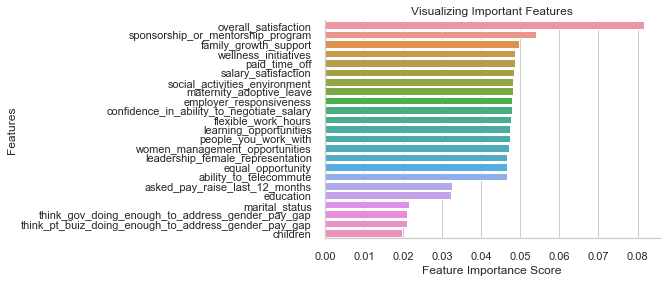

In [28]:
%matplotlib inline

# Creating a bar plot
sns.set()
sns.set_style("whitegrid")
sns.barplot(x = feature_imp, y = feature_imp.index)
sns.despine()

# Adding labels to graph
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [29]:
# Random Forest Prediction Model for Location
# creating features
X = df.drop(["company_id", "company_name", "last_year_of_employment", "location", "job_type",
            "job_level", "department", "job_title", "sex_orientation", "gender", "salary",
            "opportunity", "family", "schedule_flex", "enrichment", "culture"], axis = 1)

# creating labels
y = df["location"]

# Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

# training the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.048


In [32]:
# checking the importance of the features to predict
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

overall_satisfaction                                    0.081880
sponsorship_or_mentorship_program                       0.052302
employer_responsiveness                                 0.049351
salary_satisfaction                                     0.049038
paid_time_off                                           0.048809
learning_opportunities                                  0.048574
flexible_work_hours                                     0.048506
ability_to_telecommute                                  0.048378
family_growth_support                                   0.048147
people_you_work_with                                    0.047977
confidence_in_ability_to_negotiate_salary               0.047818
leadership_female_representation                        0.047699
women_management_opportunities                          0.047618
social_activities_environment                           0.047523
equal_opportunity                                       0.047291
wellness_initiatives     

No handles with labels found to put in legend.


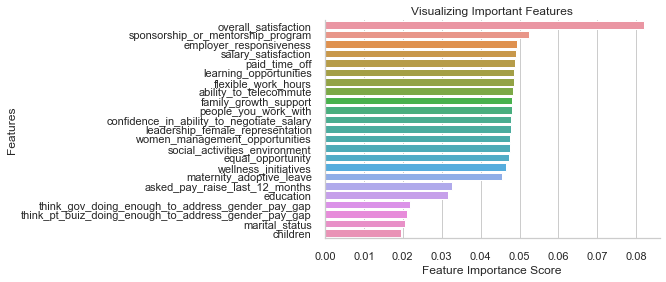

In [33]:
%matplotlib inline

# Creating a bar plot
sns.set()
sns.set_style("whitegrid")
sns.barplot(x = feature_imp, y = feature_imp.index)
sns.despine()

# Adding labels to graph
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [34]:
"""
def update_panel_json(input_json, target_key, update_value):
    if type(input_json) is dict and input_json:
        for key in input_json:
            if key == target_key:
                input_json[key] = update_value
            update_panel_json(input_json[key], target_key, update_value)

    elif type(input_json) is list and input_json:
        for entity in input_json:
            update_panel_json(entity, target_key, update_value)
"""

'\ndef update_panel_json(input_json, target_key, update_value):\n    if type(input_json) is dict and input_json:\n        for key in input_json:\n            if key == target_key:\n                input_json[key] = update_value\n            update_panel_json(input_json[key], target_key, update_value)\n\n    elif type(input_json) is list and input_json:\n        for entity in input_json:\n            update_panel_json(entity, target_key, update_value)\n'